In [4]:
!pip install ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import ta
import warnings
warnings.filterwarnings("ignore")
from datetime import date

In [5]:
stock_data = pd.read_csv('GOOG.csv')
stock_data= pd.DataFrame(stock_data)
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


### <font color='289C4E'>Dataset Attributes<font><a class='anchor' id='top'></a>

* __symbol :__  Name of the company (in this case Google).
    
* __date :__ year and date.
    
* __close:__ closing of stock value.
    
* __high:__ highest value of stock at that day.
    
* __low:__ lowest value of stock at that day.
    
* __open:__ The opening price of the stock on the given date.
    
* __volume:__The trading volume (number of shares) of the stock on the given date.

* __adjClose:__ The adjusted closing price of the stock on the given date.
    
* __adjHigh:__ The adjusted highest price reached by the stock on the given date.
    
* __adjLow:__ The adjusted lowest price reached by the stock on the given date.
    
* __adjOpen:__ The adjusted opening price of the stock on the given date.
    
* __adjVolume:__ The adjusted trading volume (number of shares) of the stock on the given date.
    
* __divCash:__ Dividends paid out on the given date (if any).
    
* __splitFactor:__ The split factor applied on the given date (if any).

### <font color='289C4E'>Exploratory Data Analysis (EDA)<font><a class='anchor' id='top'></a>

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __Data has  float and integer and two object values.__

* __No variable column has null/missing values.__
</div>


In [7]:
stock_data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
stock_data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [9]:
stock_data = stock_data.drop(['symbol'],axis=1)### removing the stock symbol information from the dataset.

In [10]:
stock_data['date']= stock_data['date'].str.split(" ", n = 1, expand = True)[0]
stock_data['date']= pd.to_datetime(stock_data['date'])
stock_data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


### <font color='289C4E'>Visualization<font><a class='anchor' id='top'></a>

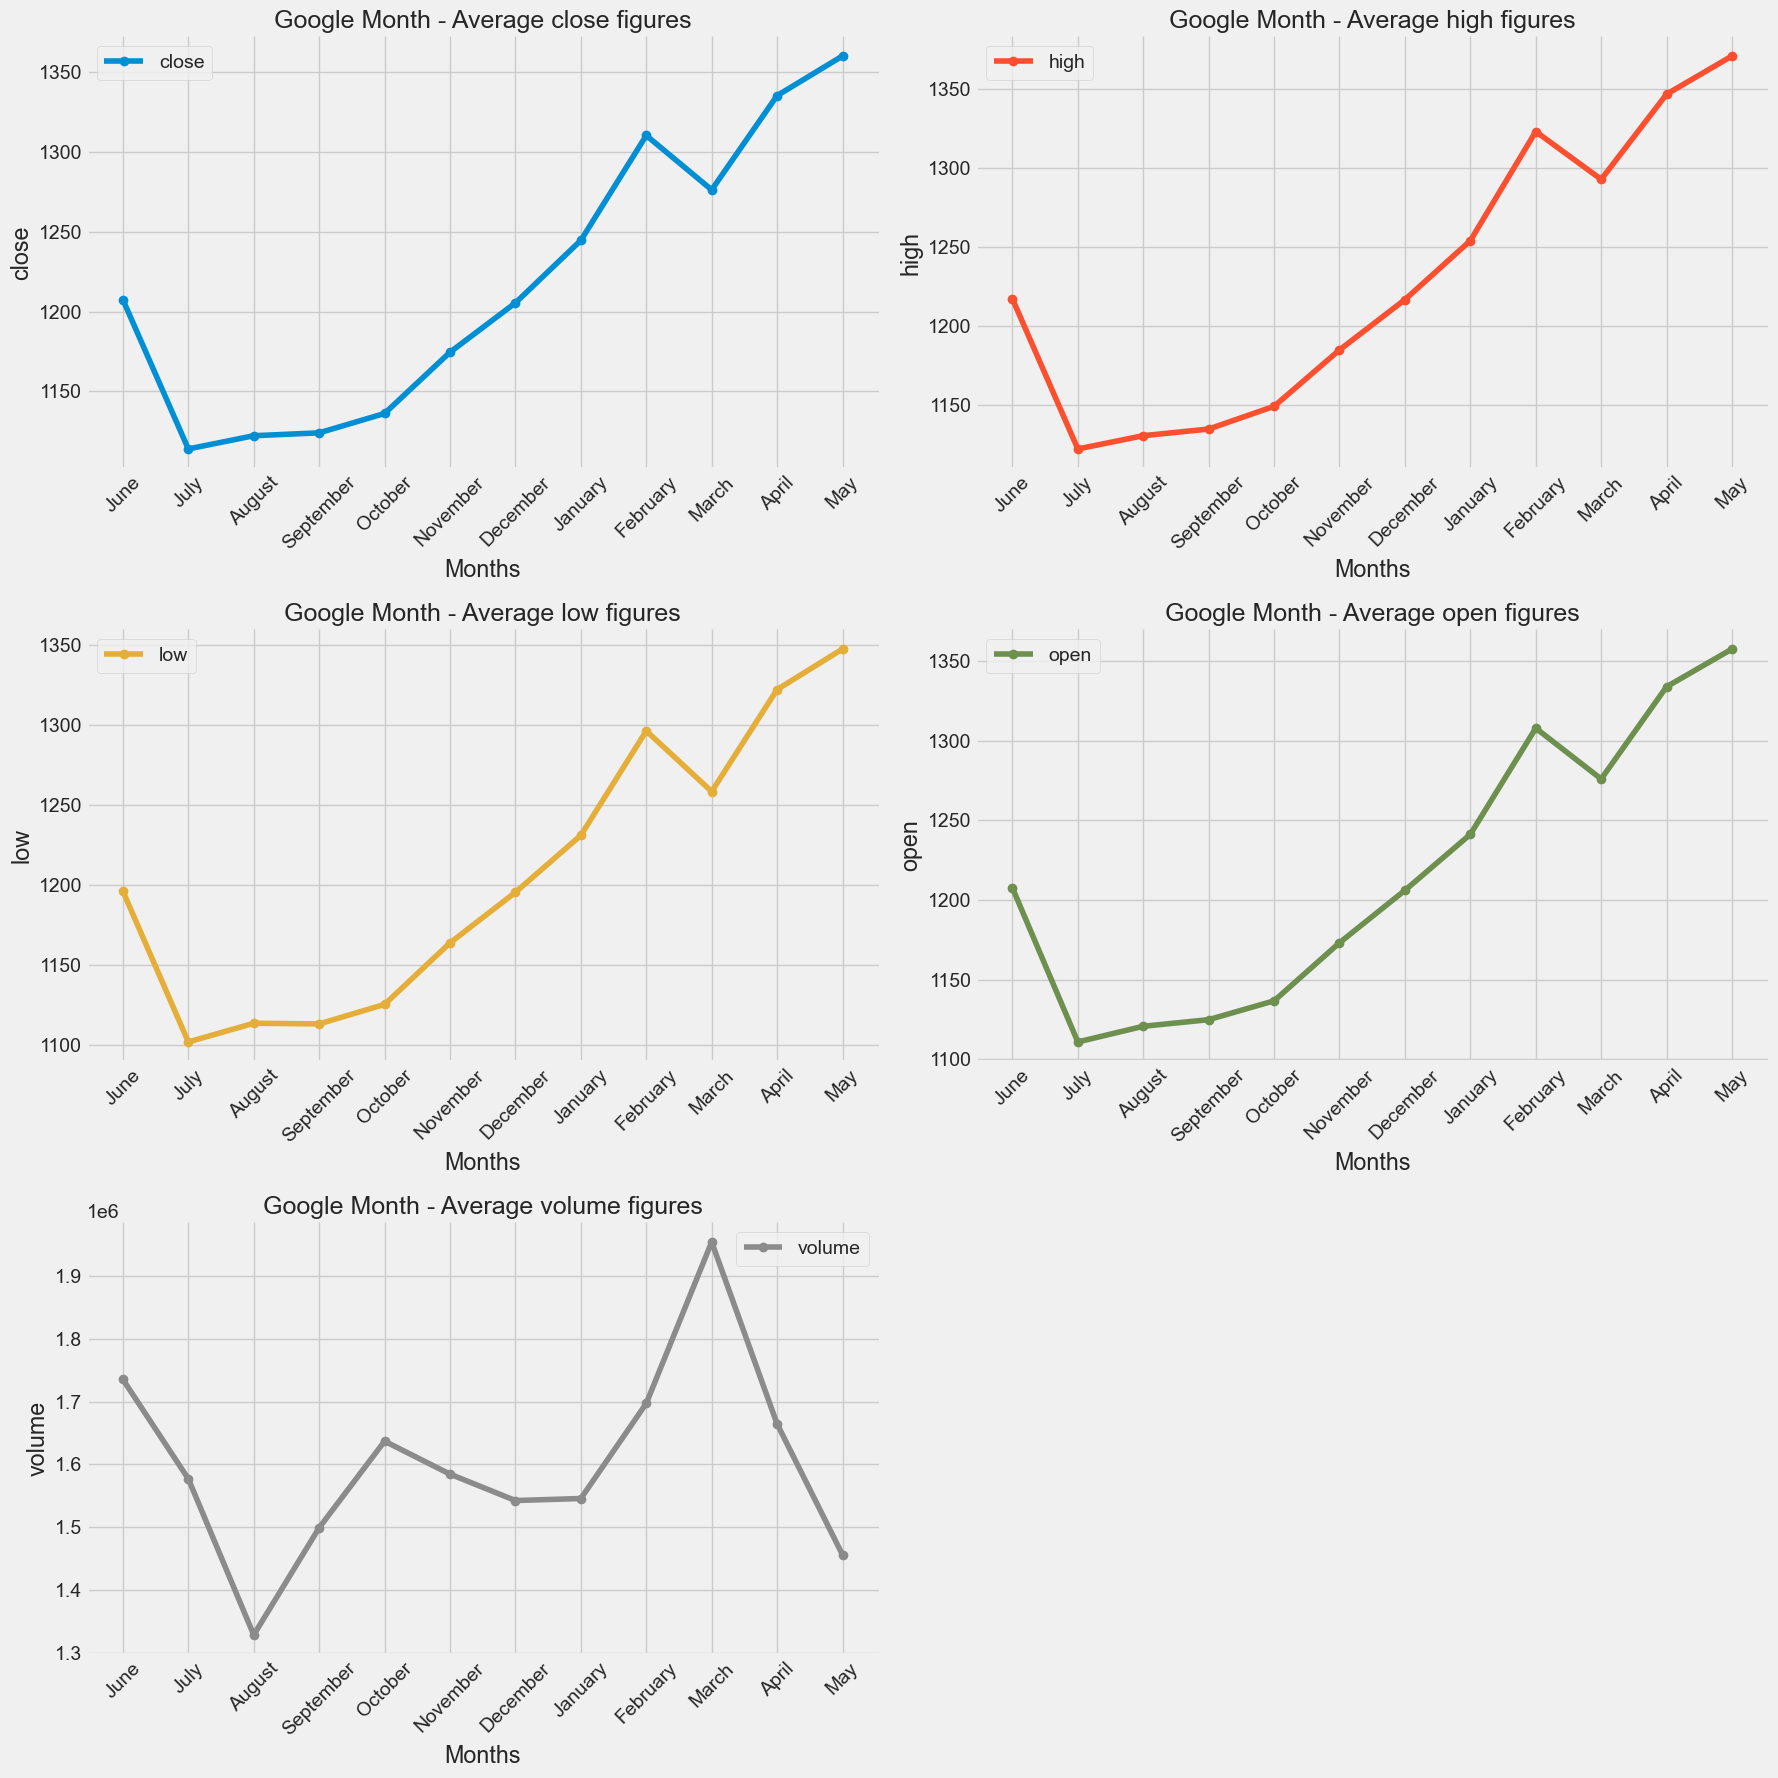

In [11]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (20, 10)
colors = plt.rcParams["axes.prop_cycle"]()
a1 = 3 
a2 = 2 
a3 = 1 

fig = plt.figure(figsize=(18, 18))

columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

for column in columns_to_plot:
    color = next(colors)["color"]
    plt.subplot(a1, a2, a3)
    plt.plot(stock_data.groupby(stock_data.index.month_name(), sort=False).mean()[column], color=color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=45)
    plt.title(f"Google Month - Average {column} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(column)
    plt.legend([column])
    a3 = a3 + 1

plt.tight_layout()
plt.show()

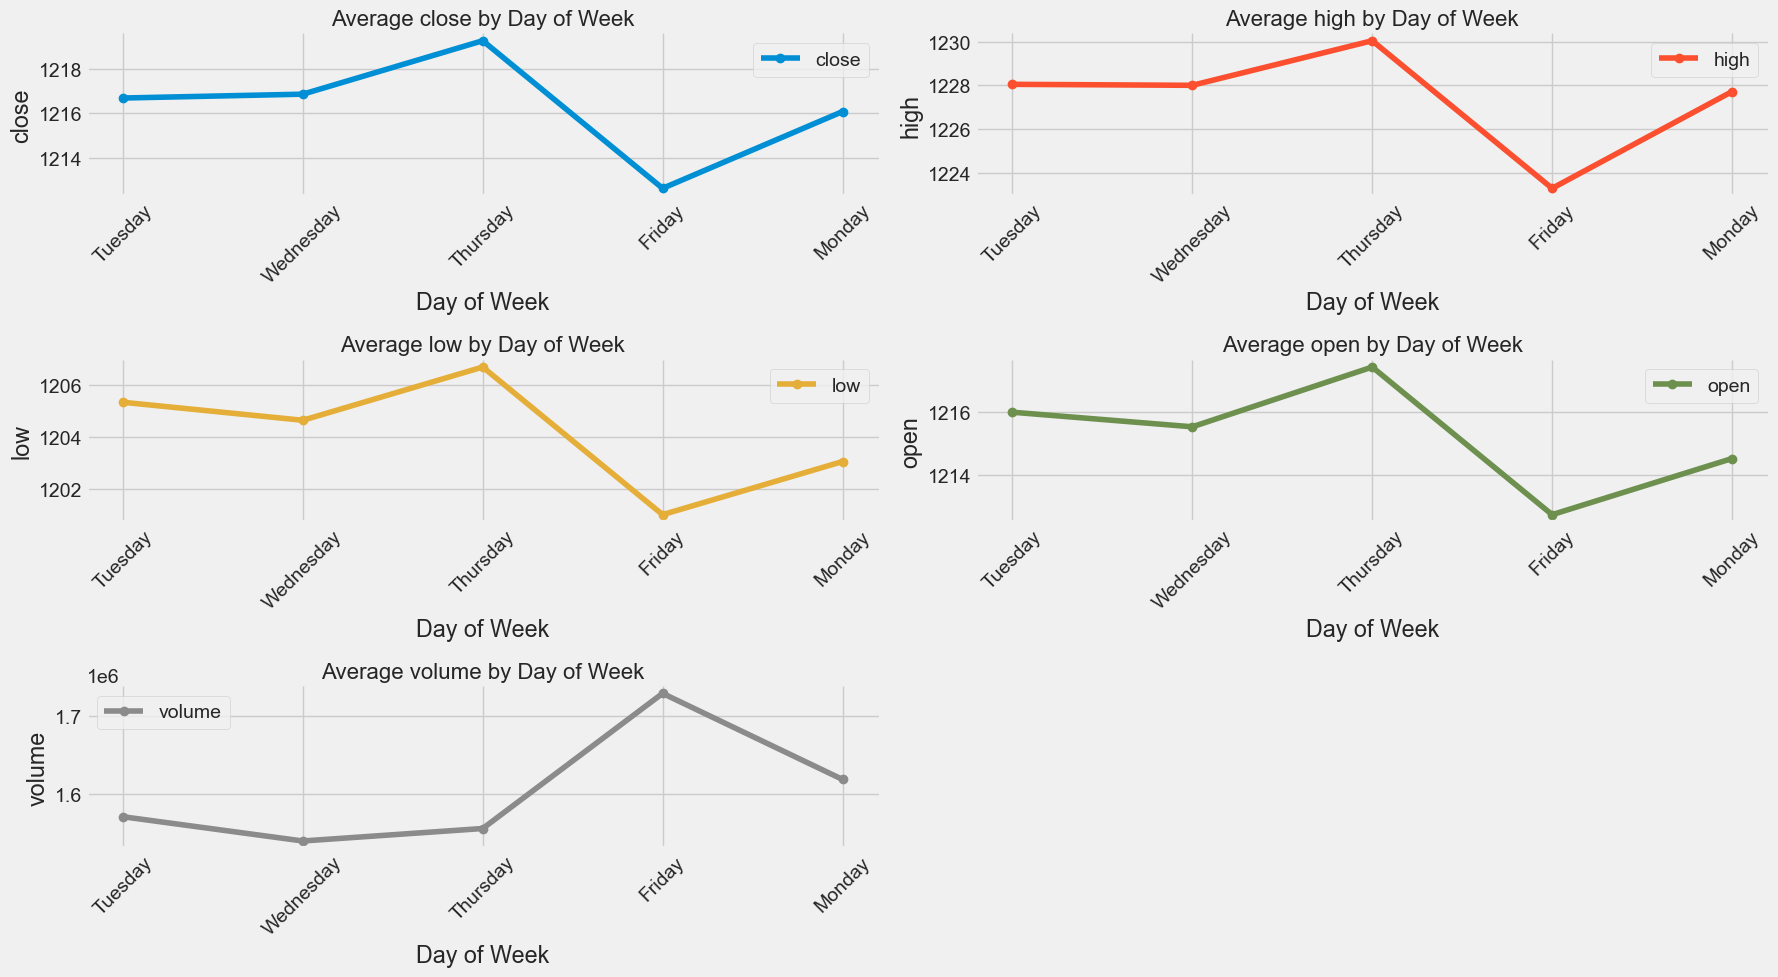

In [12]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (18, 10)
colors = plt.rcParams["axes.prop_cycle"]()
b1 = 3  
b2 = 2  
b3 = 1  

fig = plt.figure()

columns_to_plot = ['close', 'high', 'low', 'open', 'volume']##多输入

for column in columns_to_plot:
    color = next(colors)["color"]
    plt.subplot(b1, b2, b3)
    plt.plot(stock_data.groupby(stock_data.index.day_name(), sort=False)[column].mean(), color=color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=45)
    plt.title(f"Average {column} by Day of Week", fontsize=16)
    plt.xlabel('Day of Week')
    plt.ylabel(column)
    plt.legend([column])
    b3 += 1

plt.tight_layout()
plt.show()

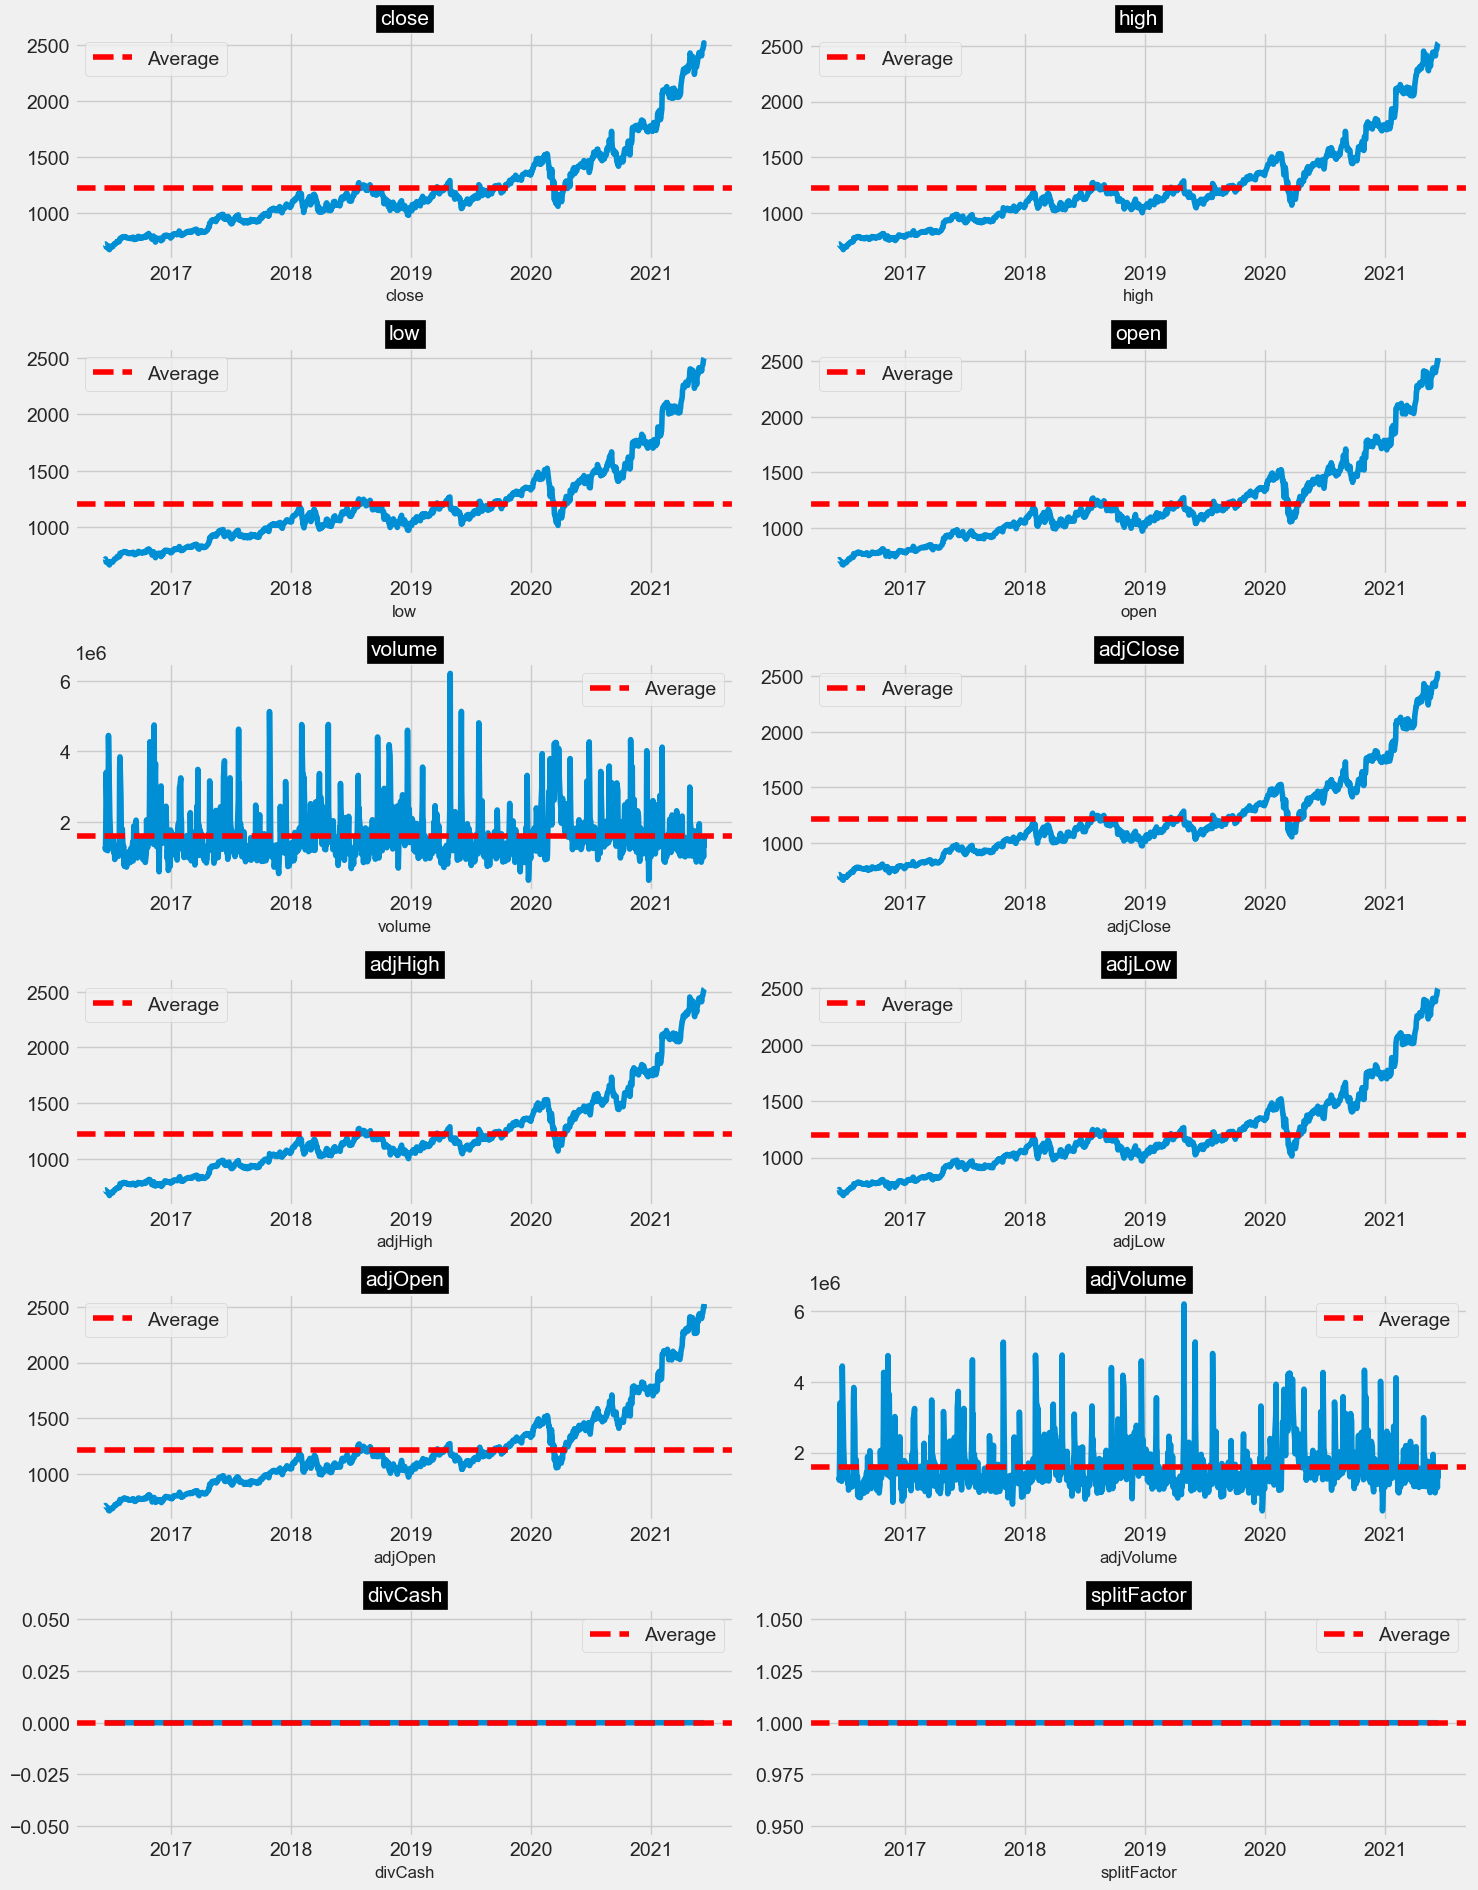

In [13]:
plt.figure(figsize=(15, 25))
for idx, column in enumerate(stock_data):
    plt.subplot(8, 2, idx + 1)
    plt.plot(stock_data.index.values, stock_data[column])
    plt.axhline(stock_data[column].mean(), color='red', linestyle='--', label='Average')
    plt.title(column, backgroundcolor='black', color='white', fontsize=15)
    plt.xlabel(column, size=12)
    plt.legend()
plt.tight_layout()
plt.show()


### EMA Plot

In [14]:
stock_data1 = pd.read_csv('GOOG.csv')
stock_data1= pd.DataFrame(stock_data1)
stock_data1 = stock_data1.drop(['symbol'],axis=1)
stock_data1['date']= stock_data1['date'].str.split(" ", n = 1, expand = True)[0]
stock_data1['date']= pd.to_datetime(stock_data1['date'])

stock_data1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


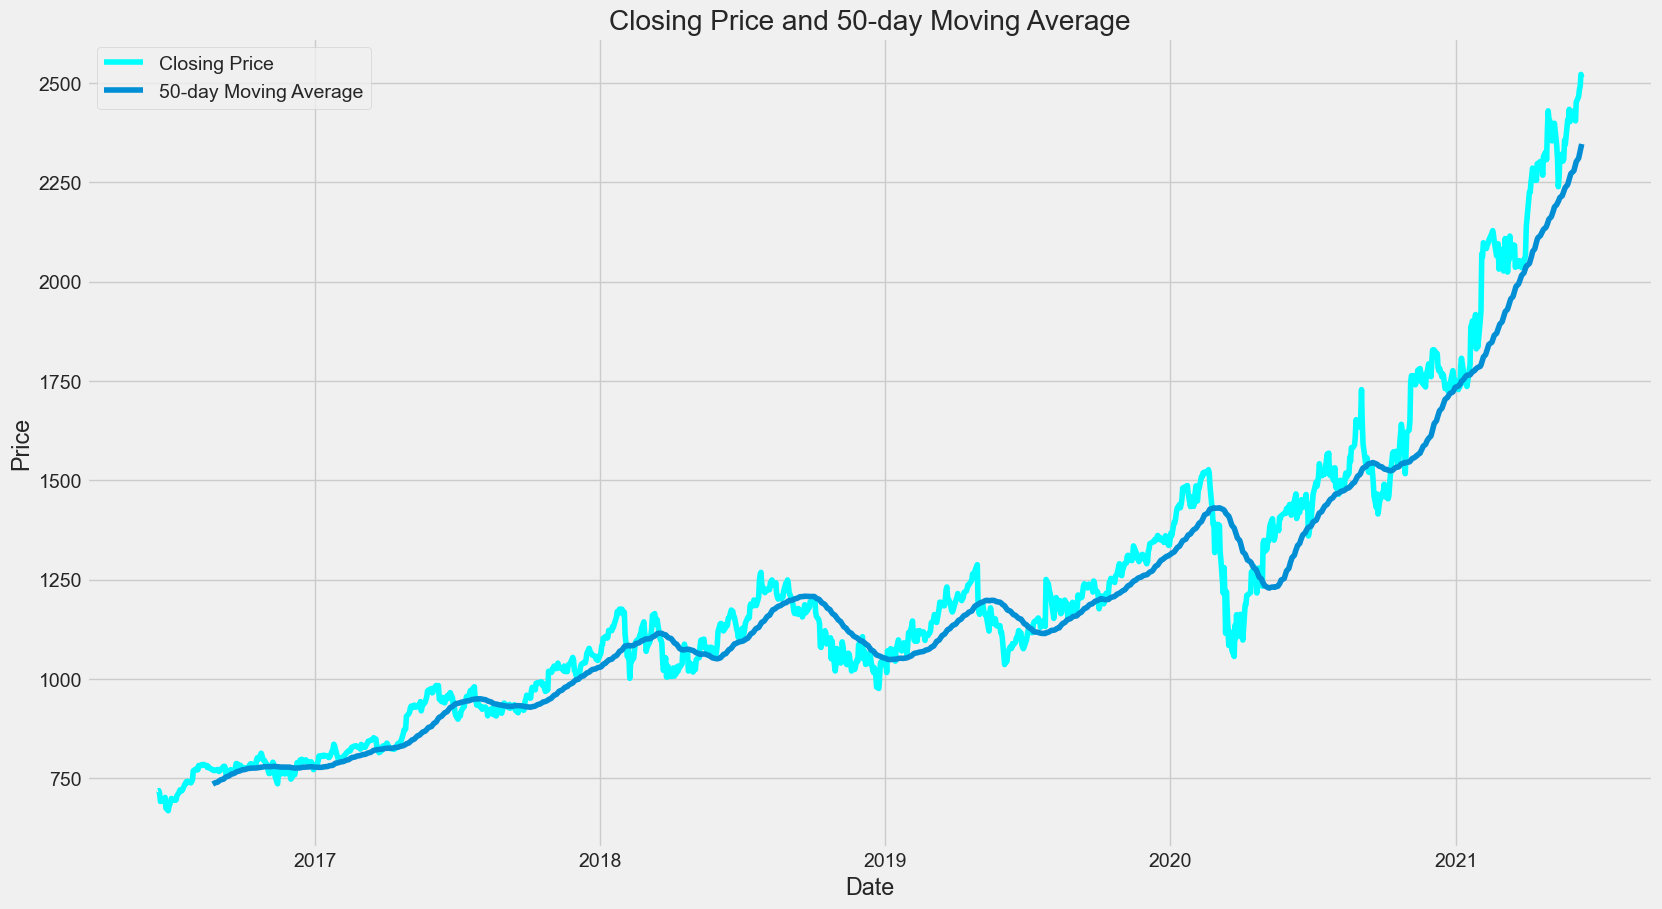

In [15]:

rolling_avg = stock_data1['close'].rolling(window=50).mean()

plt.plot(stock_data1['date'], stock_data1['close'], label='Closing Price',color='cyan')
plt.plot(stock_data1['date'], rolling_avg, label='50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 50-day Moving Average')
plt.legend()
plt.show()


### Relative Strength Index (RSI)

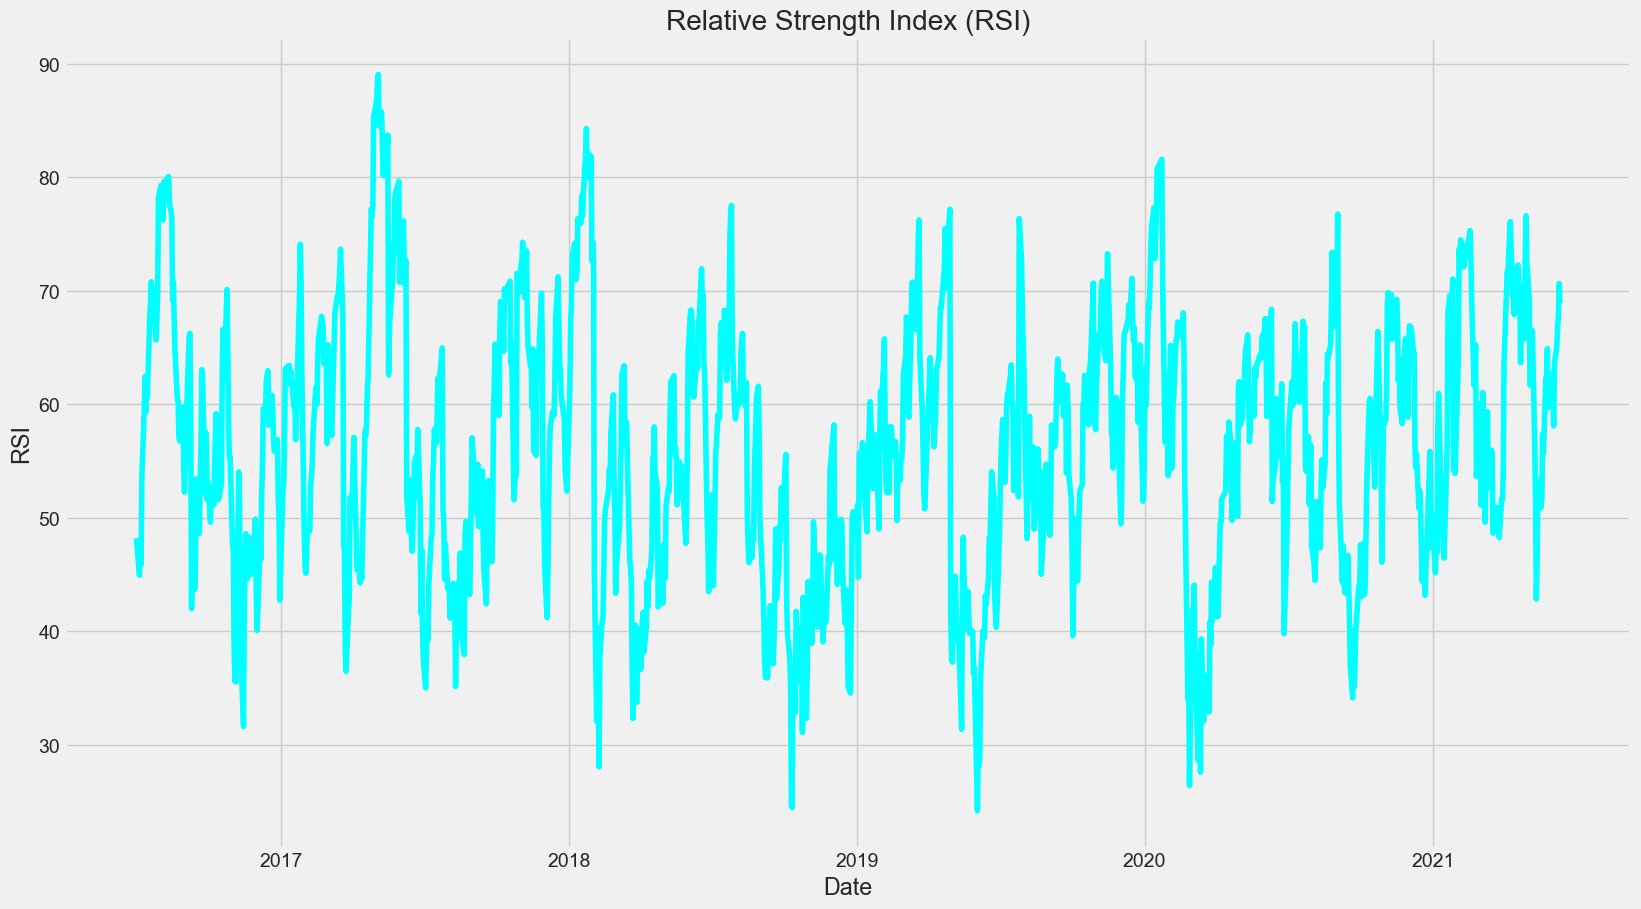

In [16]:
rsi = ta.momentum.RSIIndicator(stock_data1['close']).rsi()

plt.plot(stock_data1['date'], rsi, color='cyan')  # Change the color to red
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.show()


### Plot four of the indicators in the table and differentiate their corresponding curves by colours

<AxesSubplot:xlabel='date'>

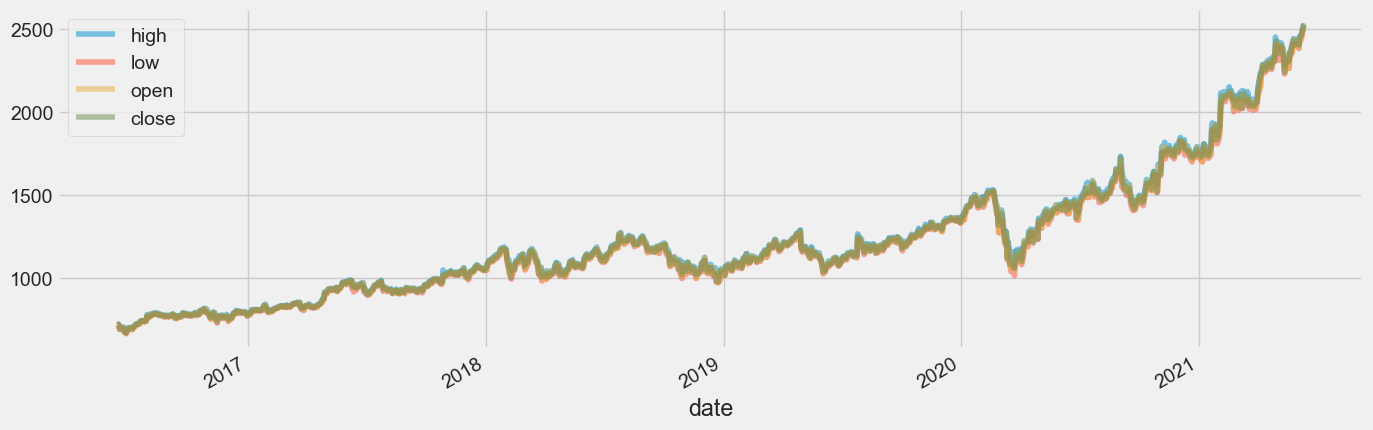

In [17]:
stock_data[['high','low','open','close']].plot(figsize = (15, 5), alpha = 0.5)

In [18]:
stock_data

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


### <font color='289C4E'>Modeling<font><a class='anchor' id='top'></a>


## LSTM

In [19]:
stock_data = stock_data[['high','low','open','close']] # Extracting required columns

In [20]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
stock_data[stock_data.columns] = MMS.fit_transform(stock_data)

In [21]:
stock_data.shape

(1258, 4)

In [22]:
training_size = round(len(stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [23]:
train_data = stock_data[:training_size]
test_data  = stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 4), (252, 4))

In [27]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

"""
这一步在做滑窗预测

"""

'\n这一步在做滑窗预测\n\n'

In [28]:
X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((956, 50, 4), (956, 4), (202, 50, 4), (202, 4))

In [30]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 4))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_absolute_error'])

print(regressor.summary())

2023-12-29 14:37:59.134347: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

Epoch 1/100
30/30 [==============================] - 6s 86ms/step - loss: 0.0096 - mean_absolute_error: 0.0722 - val_loss: 0.0453 - val_mean_absolute_error: 0.1858
Epoch 2/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0026 - mean_absolute_error: 0.0369 - val_loss: 0.0195 - val_mean_absolute_error: 0.1138
Epoch 3/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0024 - mean_absolute_error: 0.0354 - val_loss: 0.0158 - val_mean_absolute_error: 0.1032
Epoch 4/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0022 - mean_absolute_error: 0.0341 - val_loss: 0.0294 - val_mean_absolute_error: 0.1494
Epoch 5/100
30/30 [==============================] - 2s 59ms/step - loss: 0.0018 - mean_absolute_error: 0.0308 - val_loss: 0.0211 - val_mean_absolute_error: 0.1236
Epoch 6/100
30/30 [==============================] - 2s 57ms/step - loss: 0.0020 - mean_absolute_error: 0.0332 - val_loss: 0.0162 - val_mean_absolute_error: 0.1058
Epoch 7/100
30/3

Epoch 50/100
30/30 [==============================] - 2s 57ms/step - loss: 4.6987e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0048 - val_mean_absolute_error: 0.0551
Epoch 51/100
30/30 [==============================] - 2s 57ms/step - loss: 4.7565e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0094 - val_mean_absolute_error: 0.0788
Epoch 52/100
30/30 [==============================] - 2s 57ms/step - loss: 4.3628e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0075 - val_mean_absolute_error: 0.0702
Epoch 53/100
30/30 [==============================] - 2s 58ms/step - loss: 4.1543e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0068 - val_mean_absolute_error: 0.0646
Epoch 54/100
30/30 [==============================] - 2s 57ms/step - loss: 4.3678e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0055 - val_mean_absolute_error: 0.0576
Epoch 55/100
30/30 [==============================] - 2s 57ms/step - loss: 4.2555e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0110 - val_mean_absolute_

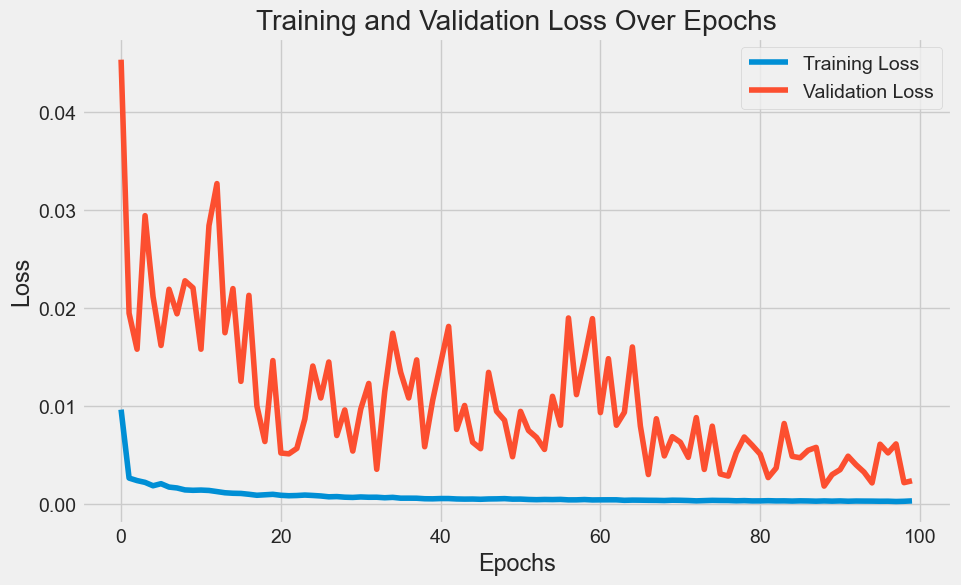

In [31]:
history = regressor.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test), batch_size = 32)

# Plotting the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### predict

In [32]:
test_predicted = regressor.predict(X_test)
test_predicted[:5]

7/7 [==============================] - 1s 15ms/step


array([[0.49065346, 0.48480594, 0.4833731 , 0.48725075],
       [0.49785703, 0.49260414, 0.4908855 , 0.4947192 ],
       [0.5022435 , 0.49723488, 0.49538413, 0.49922967],
       [0.513809  , 0.5097607 , 0.50744975, 0.51117367],
       [0.5247007 , 0.52149683, 0.51880133, 0.5224352 ]], dtype=float32)

In [33]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1582.31  , 1552.9058, 1567.1351, 1571.3014],
       [1595.6705, 1567.2155, 1581.0625, 1585.143 ],
       [1603.806 , 1575.7129, 1589.4025, 1593.5023],
       [1625.2565, 1598.6979, 1611.7712, 1615.6387],
       [1645.4572, 1620.2338, 1632.8162, 1636.5101]], dtype=float32)

In [34]:
# Merging actual and predicted data for better visualization

merge_data = pd.concat([stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['high_predicted','low_predicted','open_predicted','close_predicted'],index=stock_data.iloc[-202:].index)], axis=1)

In [35]:
merge_data[['high','low','open','close']] = MMS.inverse_transform(merge_data[['high','low','open','close']]) # Inverse scaling

In [36]:
merge_data.head()

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
date,,,,,,,,
2020-08-24,1614.1700,1580.57,1593.98,1588.20,1582.310059,1552.905762,1567.135132,1571.301392
2020-08-25,1611.6200,1582.07,1582.07,1608.22,1595.670532,1567.215454,1581.062500,1585.142944
2020-08-26,1659.2200,1603.60,1608.00,1652.38,1603.806030,1575.712891,1589.402466,1593.502319
2020-08-27,1655.0000,1625.75,1653.68,1634.33,1625.256470,1598.697876,1611.771240,1615.638672
2020-08-28,1647.1699,1630.75,1633.49,1644.41,1645.457153,1620.233765,1632.816162,1636.510132


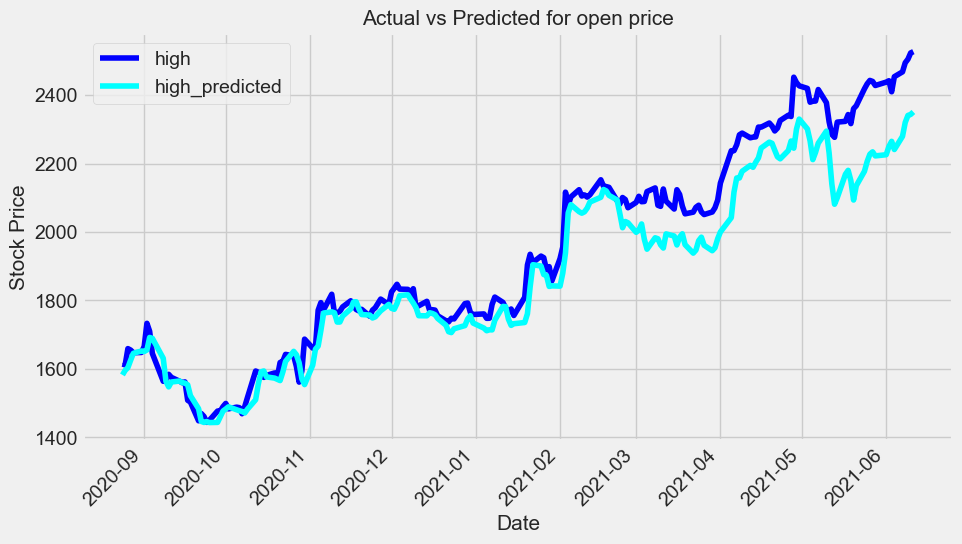

In [37]:
merge_data[['high','high_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

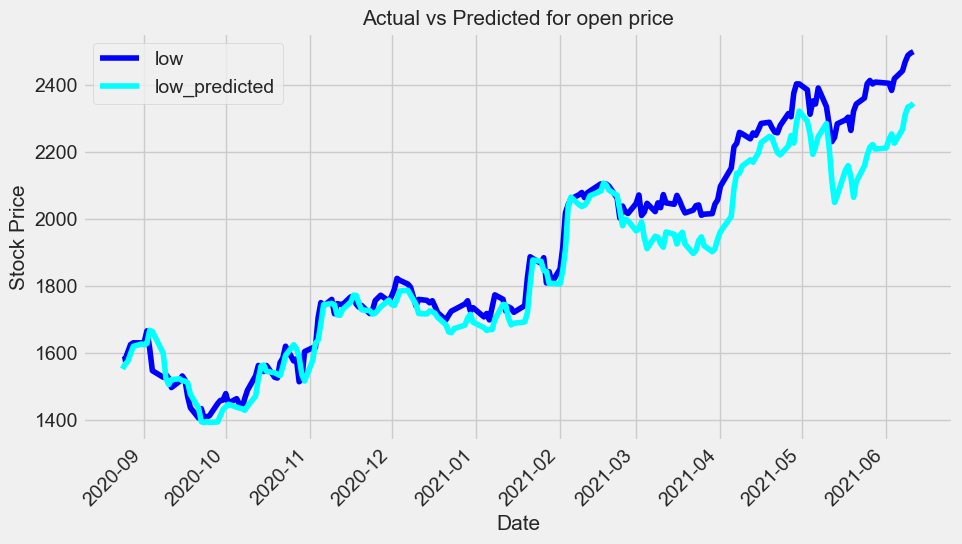

In [38]:
merge_data[['low','low_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

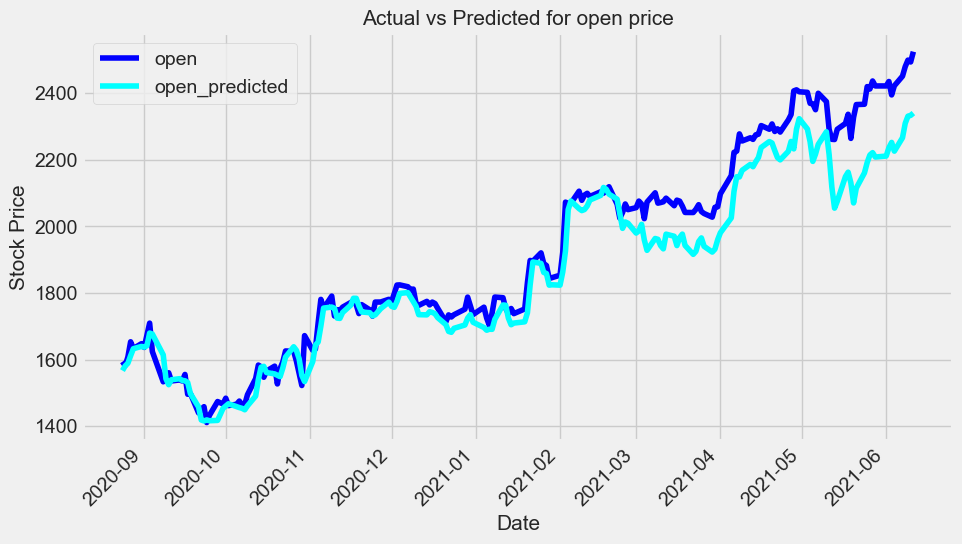

In [39]:
merge_data[['open','open_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

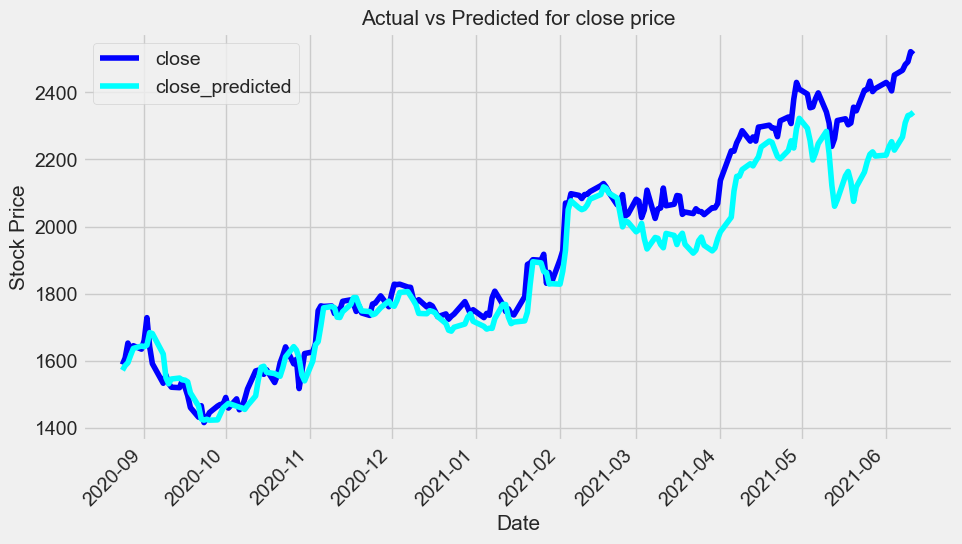

In [40]:
merge_data[['close','close_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

### 1. Histogram of Prediction Errors

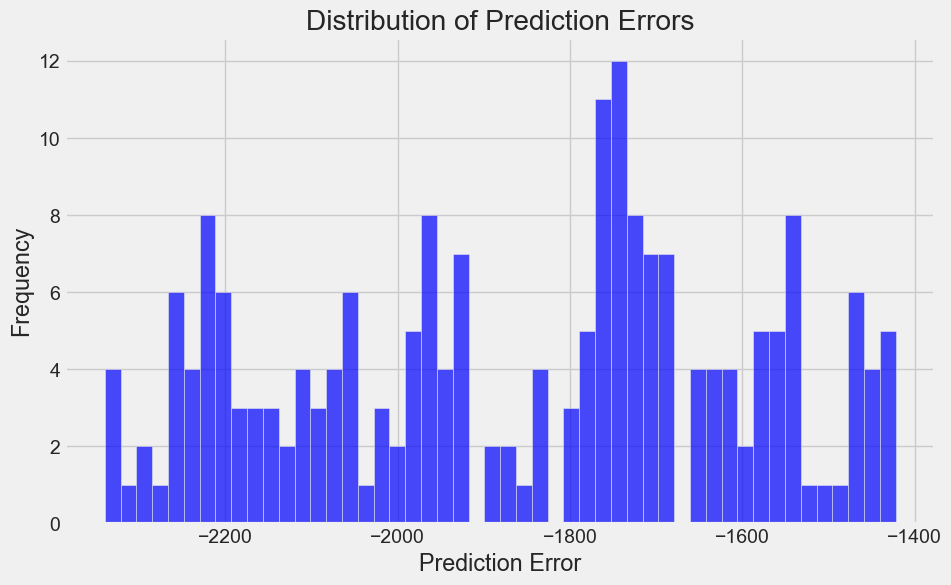

In [43]:
import numpy as np
import matplotlib.pyplot as plt

actual_close_prices = test_data['close'][50:].values  

errors = actual_close_prices - test_inverse_predicted[:, 3]  

plt.figure(figsize=(10,6))
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

### 2. Bar Chart of Feature Importance

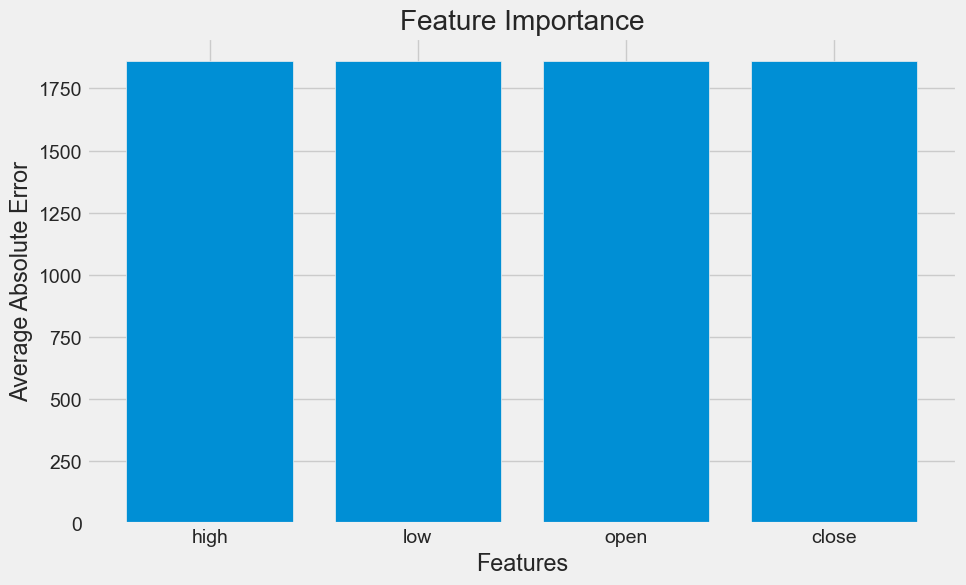

In [44]:
feature_importance = np.mean(np.abs(errors), axis=0)

plt.figure(figsize=(10,6))
plt.bar(range(len(stock_data.columns)), feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Average Absolute Error')
plt.xticks(range(len(stock_data.columns)), stock_data.columns)
plt.show()

## 3. Graph of Confidence Intervals

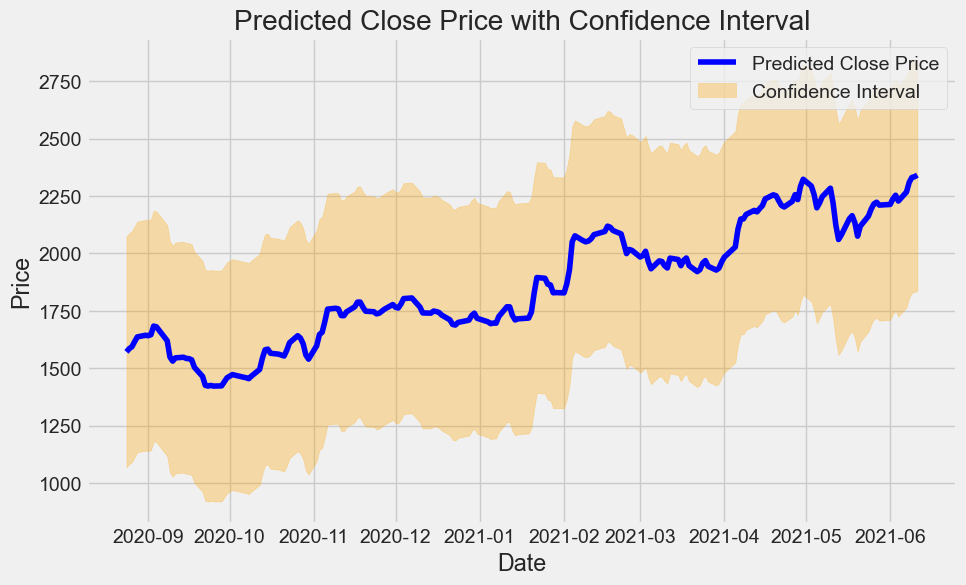

In [49]:
# Calculating standard deviation of the errors
std_deviation = np.std(errors)

# Assuming normal distribution, you can get a 95% confidence interval
lower_bound = test_inverse_predicted[:, 3] - 1.96 * std_deviation
upper_bound = test_inverse_predicted[:, 3] + 1.96 * std_deviation

plt.figure(figsize=(10,6))
plt.plot(test_data[50:].index, test_inverse_predicted[:, 3], color='blue', label='Predicted Close Price')
plt.fill_between(test_data[50:].index, lower_bound, upper_bound, color='orange', alpha=0.3, label='Confidence Interval')
plt.title('Predicted Close Price with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## RNN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2750      
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)               

Epoch 41/100
30/30 [==============================] - 1s 29ms/step - loss: 0.0019 - mean_absolute_error: 0.0322 - val_loss: 0.0092 - val_mean_absolute_error: 0.0774
Epoch 42/100
30/30 [==============================] - 1s 29ms/step - loss: 0.0020 - mean_absolute_error: 0.0339 - val_loss: 0.0097 - val_mean_absolute_error: 0.0795
Epoch 43/100
30/30 [==============================] - 1s 29ms/step - loss: 0.0017 - mean_absolute_error: 0.0312 - val_loss: 0.0068 - val_mean_absolute_error: 0.0649
Epoch 44/100
30/30 [==============================] - 1s 28ms/step - loss: 0.0017 - mean_absolute_error: 0.0313 - val_loss: 0.0138 - val_mean_absolute_error: 0.1016
Epoch 45/100
30/30 [==============================] - 1s 28ms/step - loss: 0.0016 - mean_absolute_error: 0.0308 - val_loss: 0.0094 - val_mean_absolute_error: 0.0805
Epoch 46/100
30/30 [==============================] - 1s 28ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - val_loss: 0.0065 - val_mean_absolute_error: 0.0640
Epoch 47/1

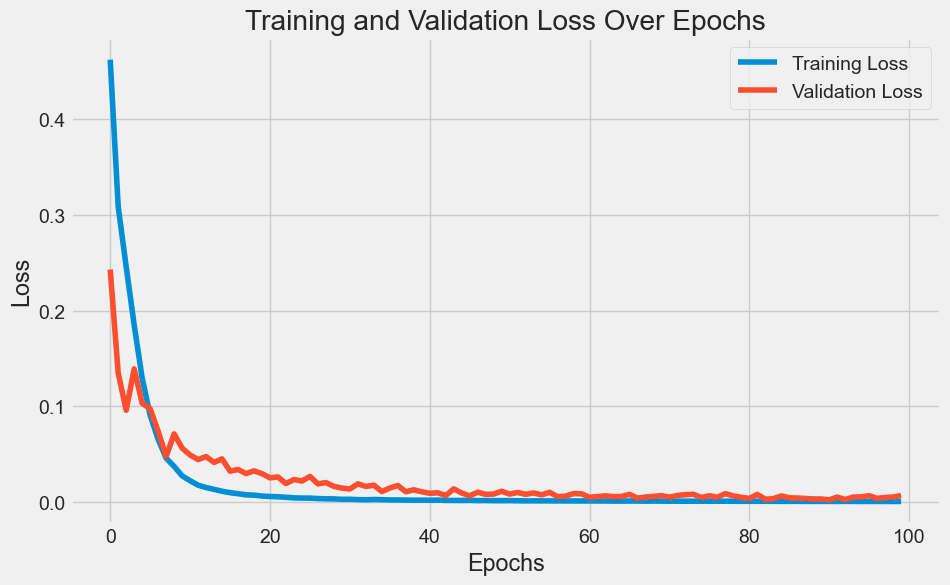

In [50]:
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Sequential

# Initialize the RNN
regressor = Sequential()

# Adding the first SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=4))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# RNN Summary
print(regressor.summary())

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Plotting the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [51]:
test_predicted = regressor.predict(X_test)
test_predicted[:5]

7/7 [==============================] - 0s 8ms/step


array([[0.4583462 , 0.45364845, 0.45312288, 0.45922658],
       [0.46111506, 0.4548931 , 0.4500224 , 0.45510766],
       [0.4664659 , 0.4668042 , 0.46249864, 0.46816933],
       [0.47453922, 0.4736879 , 0.46828842, 0.47193915],
       [0.4906491 , 0.4796883 , 0.4829478 , 0.48814973]], dtype=float32)

In [52]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1522.3901, 1495.7316, 1511.0536, 1519.3629],
       [1527.5255, 1498.0155, 1505.3055, 1511.7292],
       [1537.4497, 1519.8724, 1528.4354, 1535.937 ],
       [1552.4232, 1532.504 , 1539.1693, 1542.9237],
       [1582.302 , 1543.5149, 1566.3466, 1572.9674]], dtype=float32)

In [53]:
merge_data = pd.concat([stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['high_predicted','low_predicted','open_predicted','close_predicted'],index=stock_data.iloc[-202:].index)], axis=1)


In [54]:
merge_data[['high','low','open','close']] = MMS.inverse_transform(merge_data[['high','low','open','close']]) # Inverse scaling

In [55]:
merge_data.head()

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
date,,,,,,,,
2020-08-24,1614.1700,1580.57,1593.98,1588.20,1522.390137,1495.731567,1511.053589,1519.362915
2020-08-25,1611.6200,1582.07,1582.07,1608.22,1527.525513,1498.015503,1505.305542,1511.729248
2020-08-26,1659.2200,1603.60,1608.00,1652.38,1537.449707,1519.872437,1528.435425,1535.937012
2020-08-27,1655.0000,1625.75,1653.68,1634.33,1552.423218,1532.504028,1539.169312,1542.923706
2020-08-28,1647.1699,1630.75,1633.49,1644.41,1582.302002,1543.514893,1566.346558,1572.967407


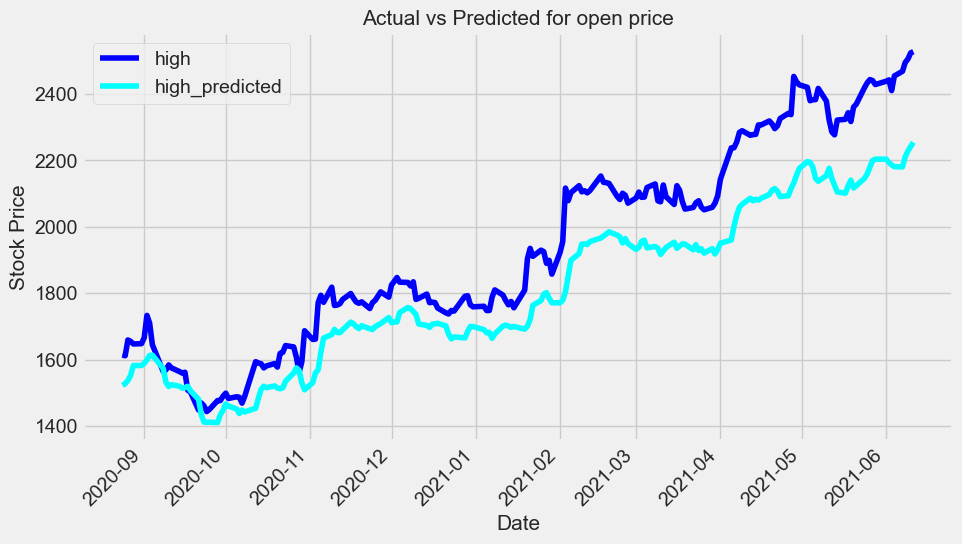

In [56]:
merge_data[['high','high_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

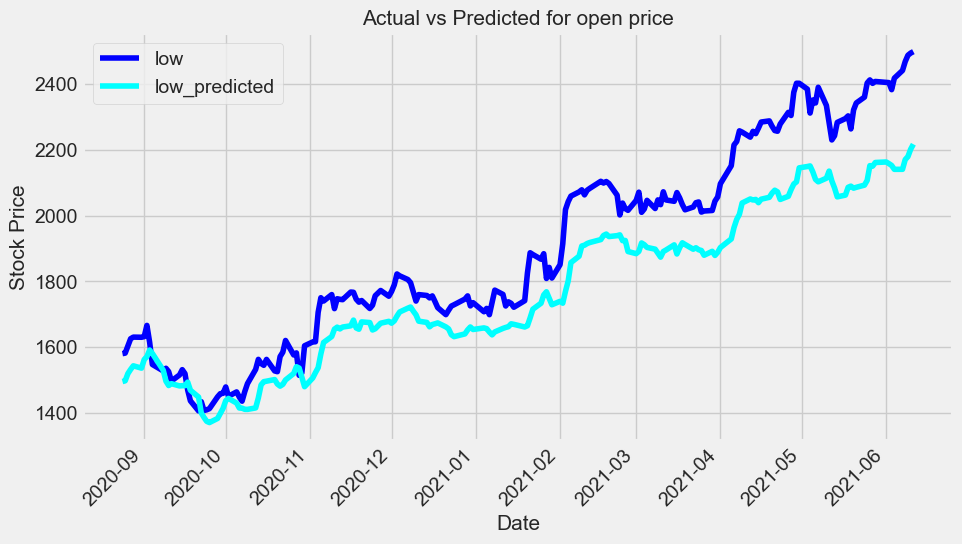

In [57]:
merge_data[['low','low_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

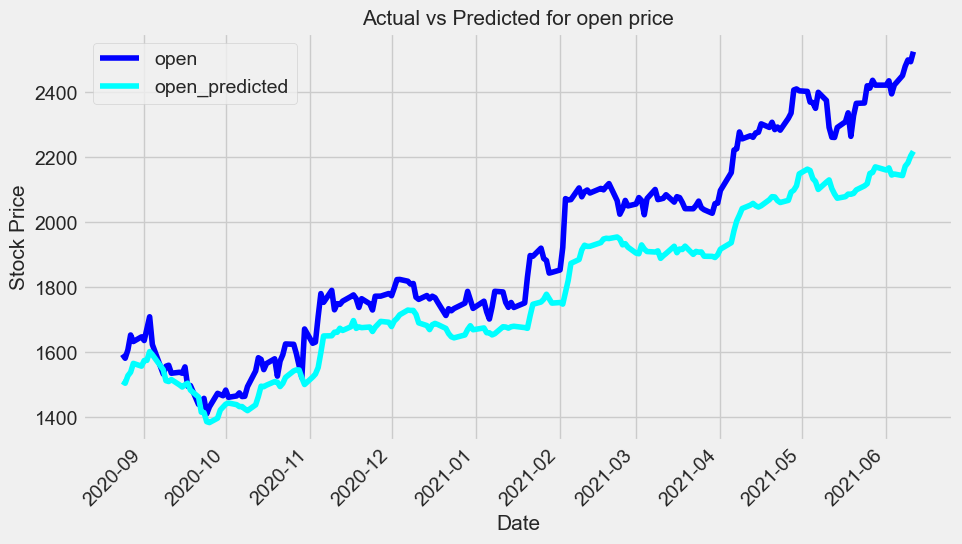

In [58]:
merge_data[['open','open_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

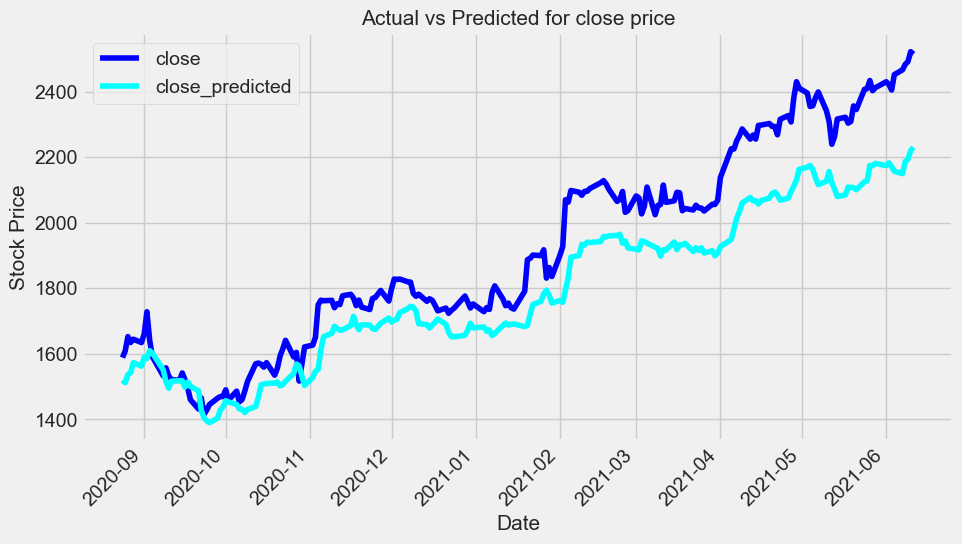

In [59]:
merge_data[['close','close_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

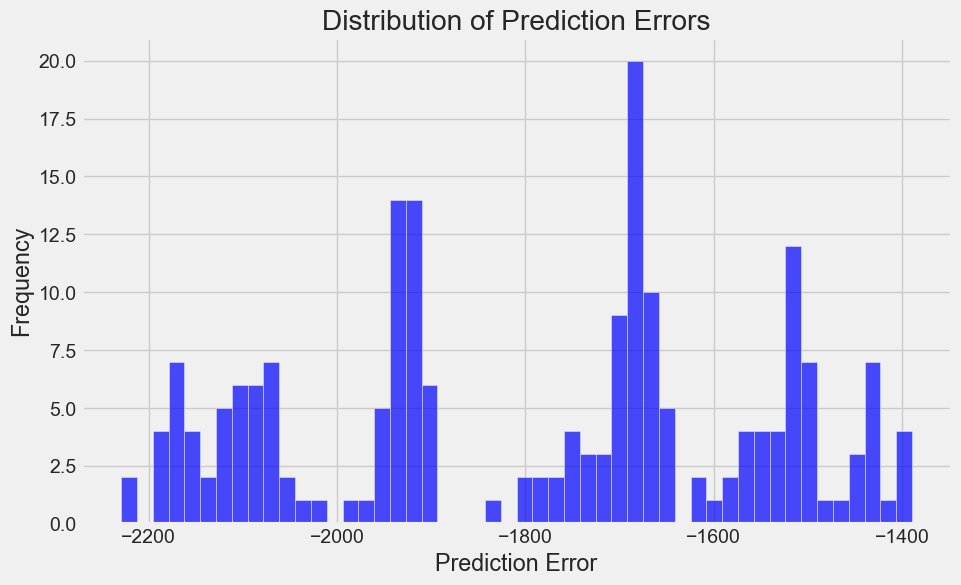

In [60]:
import numpy as np
import matplotlib.pyplot as plt

actual_close_prices = test_data['close'][50:].values  

errors = actual_close_prices - test_inverse_predicted[:, 3]  

plt.figure(figsize=(10,6))
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

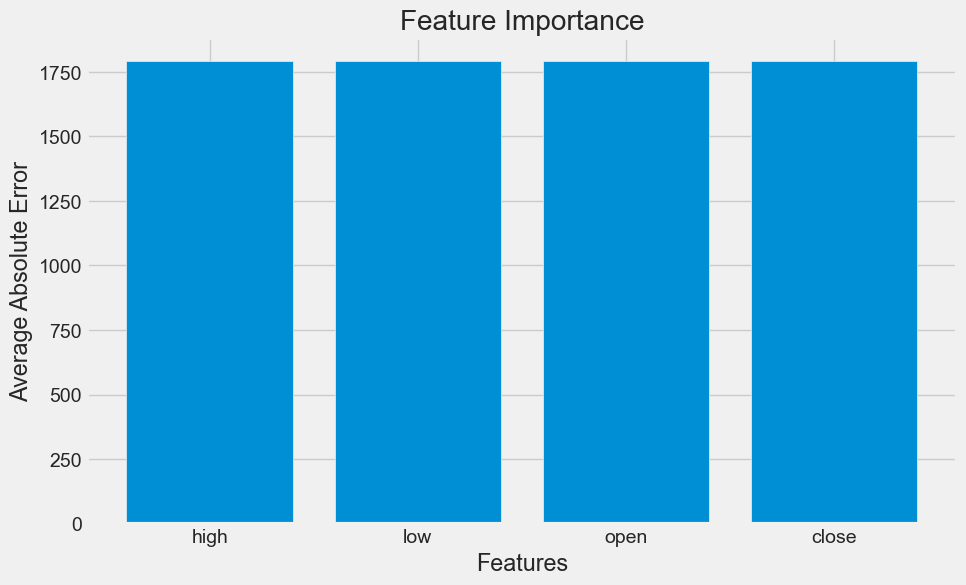

In [61]:
feature_importance = np.mean(np.abs(errors), axis=0)

plt.figure(figsize=(10,6))
plt.bar(range(len(stock_data.columns)), feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Average Absolute Error')
plt.xticks(range(len(stock_data.columns)), stock_data.columns)
plt.show()

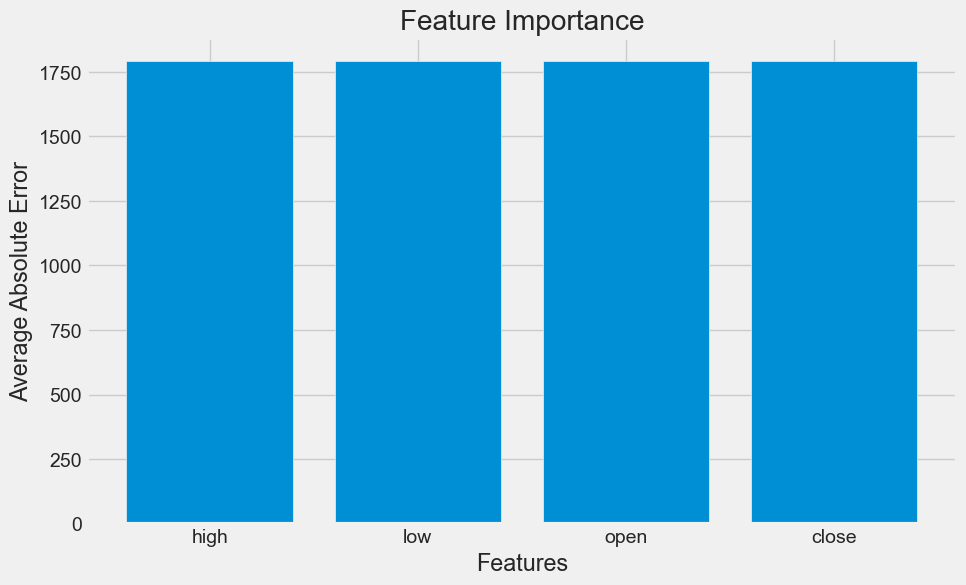

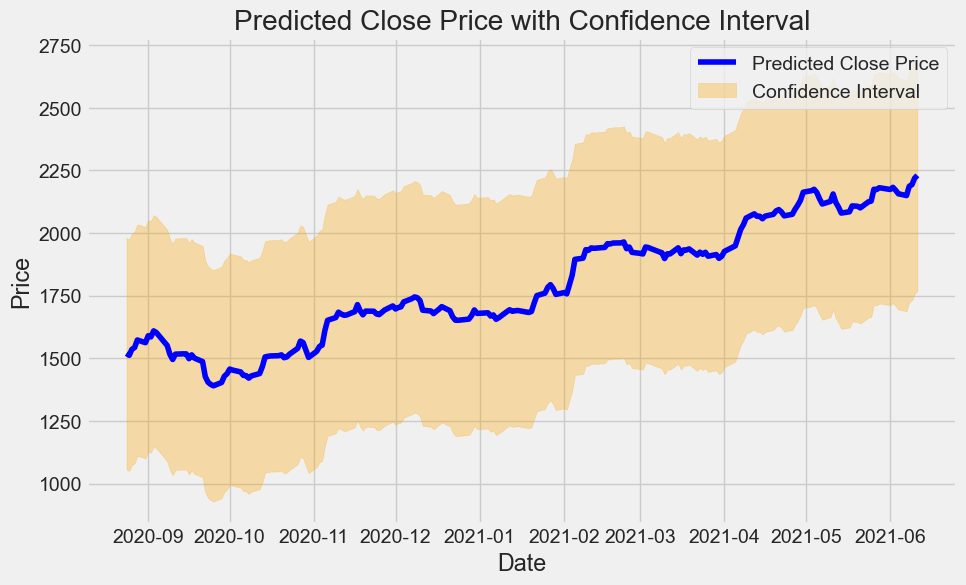

In [63]:
# Calculating standard deviation of the errors
std_deviation = np.std(errors)

# Assuming normal distribution, you can get a 95% confidence interval
lower_bound = test_inverse_predicted[:, 3] - 1.96 * std_deviation
upper_bound = test_inverse_predicted[:, 3] + 1.96 * std_deviation

plt.figure(figsize=(10,6))
plt.plot(test_data[50:].index, test_inverse_predicted[:, 3], color='blue', label='Predicted Close Price')
plt.fill_between(test_data[50:].index, lower_bound, upper_bound, color='orange', alpha=0.3, label='Confidence Interval')
plt.title('Predicted Close Price with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()